# A3: Visualization for Exploratory Data Analysis (part 1)

* [Exploratory real estate data analysis](#EDA)
* [Submission](#Submission)

## Background and Objective

Effective use of graphs as visual representations of data is an important skill for a data scientist. Lecture 3 gave you an introduction to principles of visualization design. In this assignment we will apply these principles when working with real-estate data.

After completing this assignment, you should be able to use, create, and improve data plots to make them effective tools to find and carry messages from your data.
We will perform visual data analysis using Python and gain experience with geospatial data.

### Further reading

**Stephen Few, "Show me the numbers - Designing Tables and Graphs to Enlighten", (2nd Ed.), Analytics Press, 2012**

In addition to the reference given in the lecture, Stephen Few's book "Show me the Numbers" is an excellent source on the principles of visual design for data analysis. Chapter 6 shows which types of graphs are suitable for different types of data and questions. Note that *marks* are called *value-encoding objects*.

As further motivating example of how visualization can bring data to life and clear up misconceptions, consider to watch [Hans Rosling's famous TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo), e.g. "The best stat's you've ever seen" from 2006.


## Real Estate EDA

**Real estate data**

Imagine you are a data scientist working at a real-estate company. In this week, your job is to analyze Vancouver housing prices. First, inspect the dataset provided via OneDrive link: [property_tax_report_2023.zip](https://1sfu-my.sharepoint.com/:u:/g/personal/sbergner_sfu_ca/EeHhDuSuAO5Hh6noBM_czBgBtunRYLjY-JXxL2l9yeQWSg?e=iCWZWU). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2023.
You can find the schema information of the dataset from the [Vancouver Open Data Portal](https://opendata.vancouver.ca/explore/dataset/property-tax-report/information/).
Familiarize yourself with the context and background info on that page before diving deeper into Exploratory Data Analysis.

We first load the data as a DataFrame. To make this analysis more interesting, we will add two new columns to the data: `CURRENT_PRICE` represents the property price in 2021; `PREVIOUS_PRICE` represents the property price in 2020.

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def displaymd(mdstr):
    display(Markdown(mdstr))

In [8]:

# use this in case you have a hidpi display and figures appear blurry
#%config InlineBackend.figure_format = 'retina'

# before running this, unzip the provided data
df = pd.read_csv("property-tax-report_2023.csv", sep=';')

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)


Let's embark on the Exploratory Data Analysis (EDA) process.

**Hint:** For some of the upcoming questions, we've provided example outputs in [A3-plots.html](A3-plots.html) for format comparison, as well as additional plots. However, remember that you are not required to replicate the same plot design exactly. Additionally, your tables will be based on a different data snapshot. Since the plot examples provided here did not fully adhere to the *Principles of Visualization Design*, I encourage you to review this section independently. As you proceed, think critically about how you might rectify some of the less effective design choices in these examples.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [10]:
# --- Write your code below ---
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
0,004-679-687,STRATA,606108040018,60610804,RM-5B,Multiple Dwelling,18,VAS1694,NaN,185,...,2021.0,494000.0,191000.0,1986.0,1986.0,2104.20,27,2021,720000.0,685000.0
1,015-163-695,LAND,598250070000,59825007,CD-1 (97),Comprehensive Development,15,VAP729,D,183,...,2021.0,5124000.0,4761000.0,1979.0,1981.0,32355.00,14,2021,9896000.0,9885000.0
2,012-215-023,STRATA,615115480004,61511548,RM-5A,Multiple Dwelling,4,VAS2283,NaN,185,...,2021.0,353000.0,173000.0,1989.0,1989.0,1586.93,27,2021,543000.0,526000.0
3,010-816-682,LAND,594190230000,59419023,HA-1A,Historical Area,11,VAP184,16,196,...,2021.0,3100000.0,31900.0,1982.0,1982.0,12169.30,26,2021,3289000.0,3131900.0
4,025-696-301,STRATA,618138950055,61813895,CD-1 (366),Comprehensive Development,55,BCS435,NaN,NaN,...,2021.0,1208000.0,318000.0,2003.0,2003.0,4374.99,30,2021,1497000.0,1526000.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.
Also, to improve readability use a pandas [DataFrame Styler](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) to format the numbers without scientific notation (i.e. no floating point exponent).

In [16]:
# --- Write your code below ---
summary = df.describe()
summary.style.format("{:.2f}") # Format the summary table to show numbers with 2 decimal places

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
count,1095658.00,1095658.00,1092849.00,1080672.00,1080672.00,1080672.00,1069042.00,1069042.00,1063540.00,1063540.00,861597.00,1095658.00,1095658.00,1080672.00,1069042.00
mean,499034199576.25,49903419.95,2392.95,1781566.50,458030.43,2022.02,1765271.04,439447.49,1984.57,1992.02,8964.33,16.55,2022.02,2239596.93,2204718.53
std,249738119589.31,24973811.96,1997.38,10226625.68,4844054.66,1.41,10149056.64,4602386.07,29.77,19.69,64799.24,8.94,1.41,12713400.09,12474189.62
min,19632060000.00,1963206.00,1.00,0.00,0.00,2020.00,0.00,0.00,1800.00,200.00,0.00,1.00,2020.00,0.00,0.00
25%,210698480001.00,21069848.00,939.00,509000.00,103000.00,2021.00,499000.00,101000.00,1973.00,1980.00,1952.38,9.00,2021.00,699000.00,687000.00
50%,613113030004.00,61311303.00,1783.00,1001000.00,197000.00,2022.00,994000.00,193000.00,1994.00,1995.00,3982.43,16.00,2022.00,1235000.00,1221300.00
75%,690084470000.00,69008447.00,3357.00,1730000.00,326000.00,2023.00,1652000.00,317000.00,2006.00,2007.00,7135.74,25.00,2023.00,2020000.00,1944375.00
max,845313420000.00,84531342.00,31888.00,3606388000.00,934655000.00,2024.00,3568531000.00,876401000.00,2022.00,2022.00,9760300.00,30.00,2024.00,3617073000.00,3578633000.00


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built.  We first check whether the column has any missing value. 

In [17]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
missing_pct = df['YEAR_BUILT'].isna().mean() * 100
print(f"Missing Value: {missing_pct:.2f} %")

Missing Value: 2.93 %


Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4.  Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column.  Suppose we want to know: "How many properties were built in each year (from 1900 to 2018)?" Please plot a line chart to answer the question.

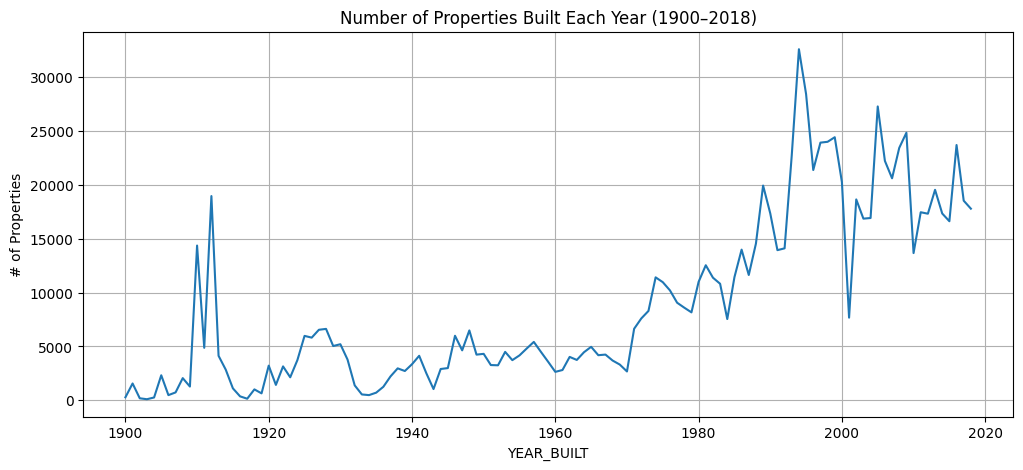

In [21]:
# --- Write your code below ---

# Remove rows where YEAR_BUILT is missing (NaN)
year_data = df['YEAR_BUILT'].dropna()

# Keep only the years between 1900 and 2018
year_data = year_data[(year_data >= 1900) & (year_data <= 2018)]

# Count how many properties were built in each year
year_counts = year_data.value_counts().sort_index()

# Create a new figure for the line chart
plt.figure(figsize=(12, 5))

# Draw a line plot:
# x-axis = year, y-axis = number of properties
plt.plot(year_counts.index, year_counts.values)

# Add a label to the x-axis
plt.xlabel("YEAR_BUILT")

# Add a label to the y-axis
plt.ylabel("# of Properties")

# Add a title to the chart
plt.title("Number of Properties Built Each Year (1900–2018)")

# Show grid lines to make the chart easier to read
plt.grid(True)

# Display the plot
plt.show()

Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='blue'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>.

**Findings**
1. Many more homes were built after the 1970s. The number of properties increases a lot and reaches the highest point around 1994 with over 30,000 homes built.
2. There is a big drop around 2001. The number of homes built falls to about 8,000, but it goes up again in the next years.

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2021, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

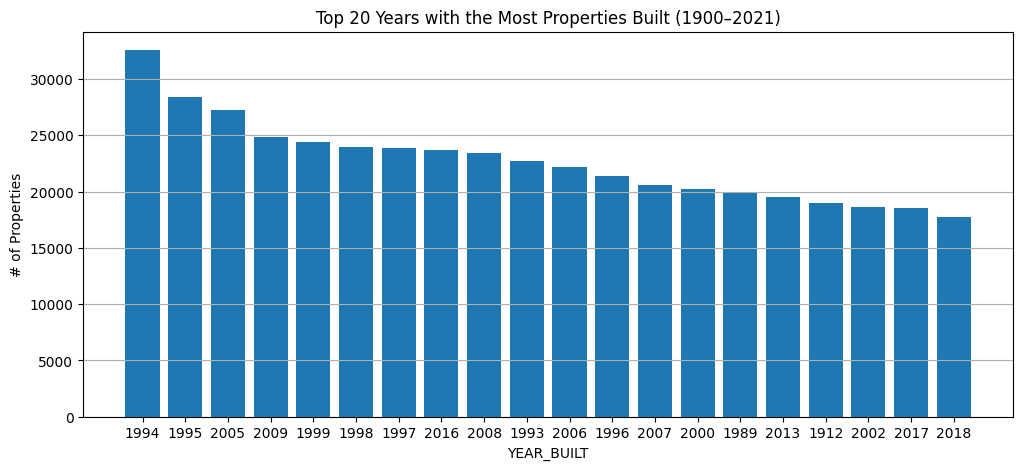

In [32]:
# --- Write your code below ---

# Remove missing years
year_data = df['YEAR_BUILT'].dropna()

# Keep only the years between 1900 and 2021
year_data = year_data[(year_data >= 1900) & (year_data <= 2021)]

# Count how many properties were built in each year
year_counts = year_data.value_counts()

# Get the top 20 years with the most properties
# Sort the counts in descending order (largest first)
top20 = year_counts.sort_values(ascending=False).head(20)

# Plot bar chart
plt.figure(figsize=(12, 5))

# x-axis = year (convert to int to remove .0, then to string to keep the order)
# y-axis = number of properties built in that year
plt.bar(top20.index.astype(int).astype(str), top20.values)

plt.xlabel("YEAR_BUILT")
plt.ylabel("# of Properties")
plt.title("Top 20 Years with the Most Properties Built (1900–2021)")
plt.grid(axis='y')

plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. 1994 has the most properties built. It is the highest bar on the chart, with over 32,000 homes, more than any other year.
2. Most of the top years are from the 1990s and 2000s. This shows that a lot of homes were built during this period compared to earlier years.

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1900 and 2020? Please plot a histogram to answer this question.

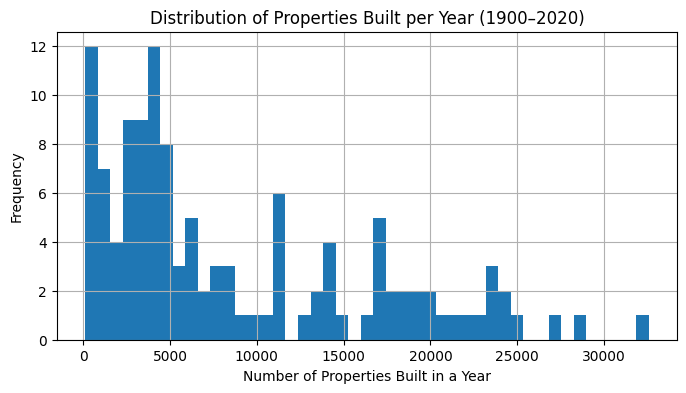

In [40]:
# --- Write your code below ---

# Remove missing years
year_data = df['YEAR_BUILT'].dropna()

# Keep only the years between 1900 and 2020
year_data = year_data[(year_data >= 1900) & (year_data <= 2020)]

# Count how many properties were built each year
year_counts = year_data.value_counts()

# Plot histogram (distribution of yearly counts)
plt.figure(figsize=(8, 4))
plt.hist(year_counts.values, bins=45)

plt.xlabel("Number of Properties Built in a Year")
plt.ylabel("Frequency")
plt.title("Distribution of Properties Built per Year (1900–2020)")
plt.grid(True)

plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Most years have a small number of properties built. The bars are highest on the left side of the chart, which means in most years fewer than 5,000 homes were built.
2. Only a few years have very large construction numbers. There are some bars far on the right side, showing that only a small number of years had over 20,000 homes built.

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

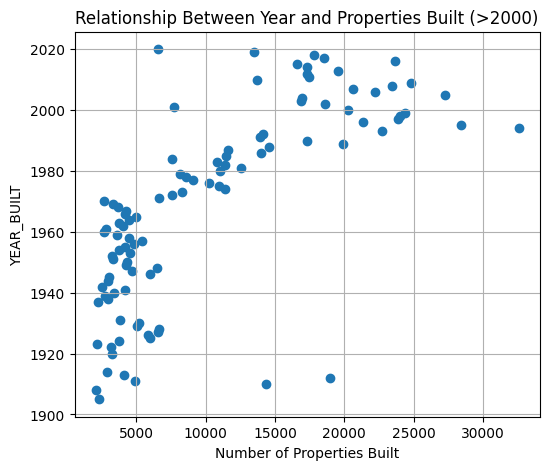

In [41]:
# --- Write your code below ---

# Remove missing years
year_data = df['YEAR_BUILT'].dropna()

# Keep only the years between 1900 and 2020
year_data = year_data[(year_data >= 1900) & (year_data <= 2020)]

# Count how many properties were built each year
year_counts = year_data.value_counts().sort_index()

# Keep only years with more than 2000 properties built
filtered = year_counts[year_counts > 2000]

# Scatter plot: x = number of properties, y = year
plt.figure(figsize=(6, 5))
plt.scatter(filtered.values, filtered.index)

plt.xlabel("Number of Properties Built")
plt.ylabel("YEAR_BUILT")
plt.title("Relationship Between Year and Properties Built (>2000)")
plt.grid(True)

plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. After around 1970, the number of properties built jumps much higher than before. Before 1970, most years are under 5,000. After 1970, many years go over 10,000 and even 30,000.
2. The relationship looks positive: newer years usually have more buildings. As the year goes up (moving higher on the y-axis), the number of properties (x-axis) also increases.

## Submission

You need to complete the first part by filling out this notebook. Please submit <font color="blue">A3-1.ipynb</font> to Canvas.